In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import utils
%matplotlib inline


In [9]:
geo = pd.read_csv('Complete_Geophysics.csv')
lith = pd.read_csv('corrected_lithology.csv')

In [4]:
hole = geo.query('HOLEID == "DD0509"')


In [6]:
subset = hole[['DENB','DENL','GRDE', 'LSDU', 'DEPTH']].sort('DEPTH')

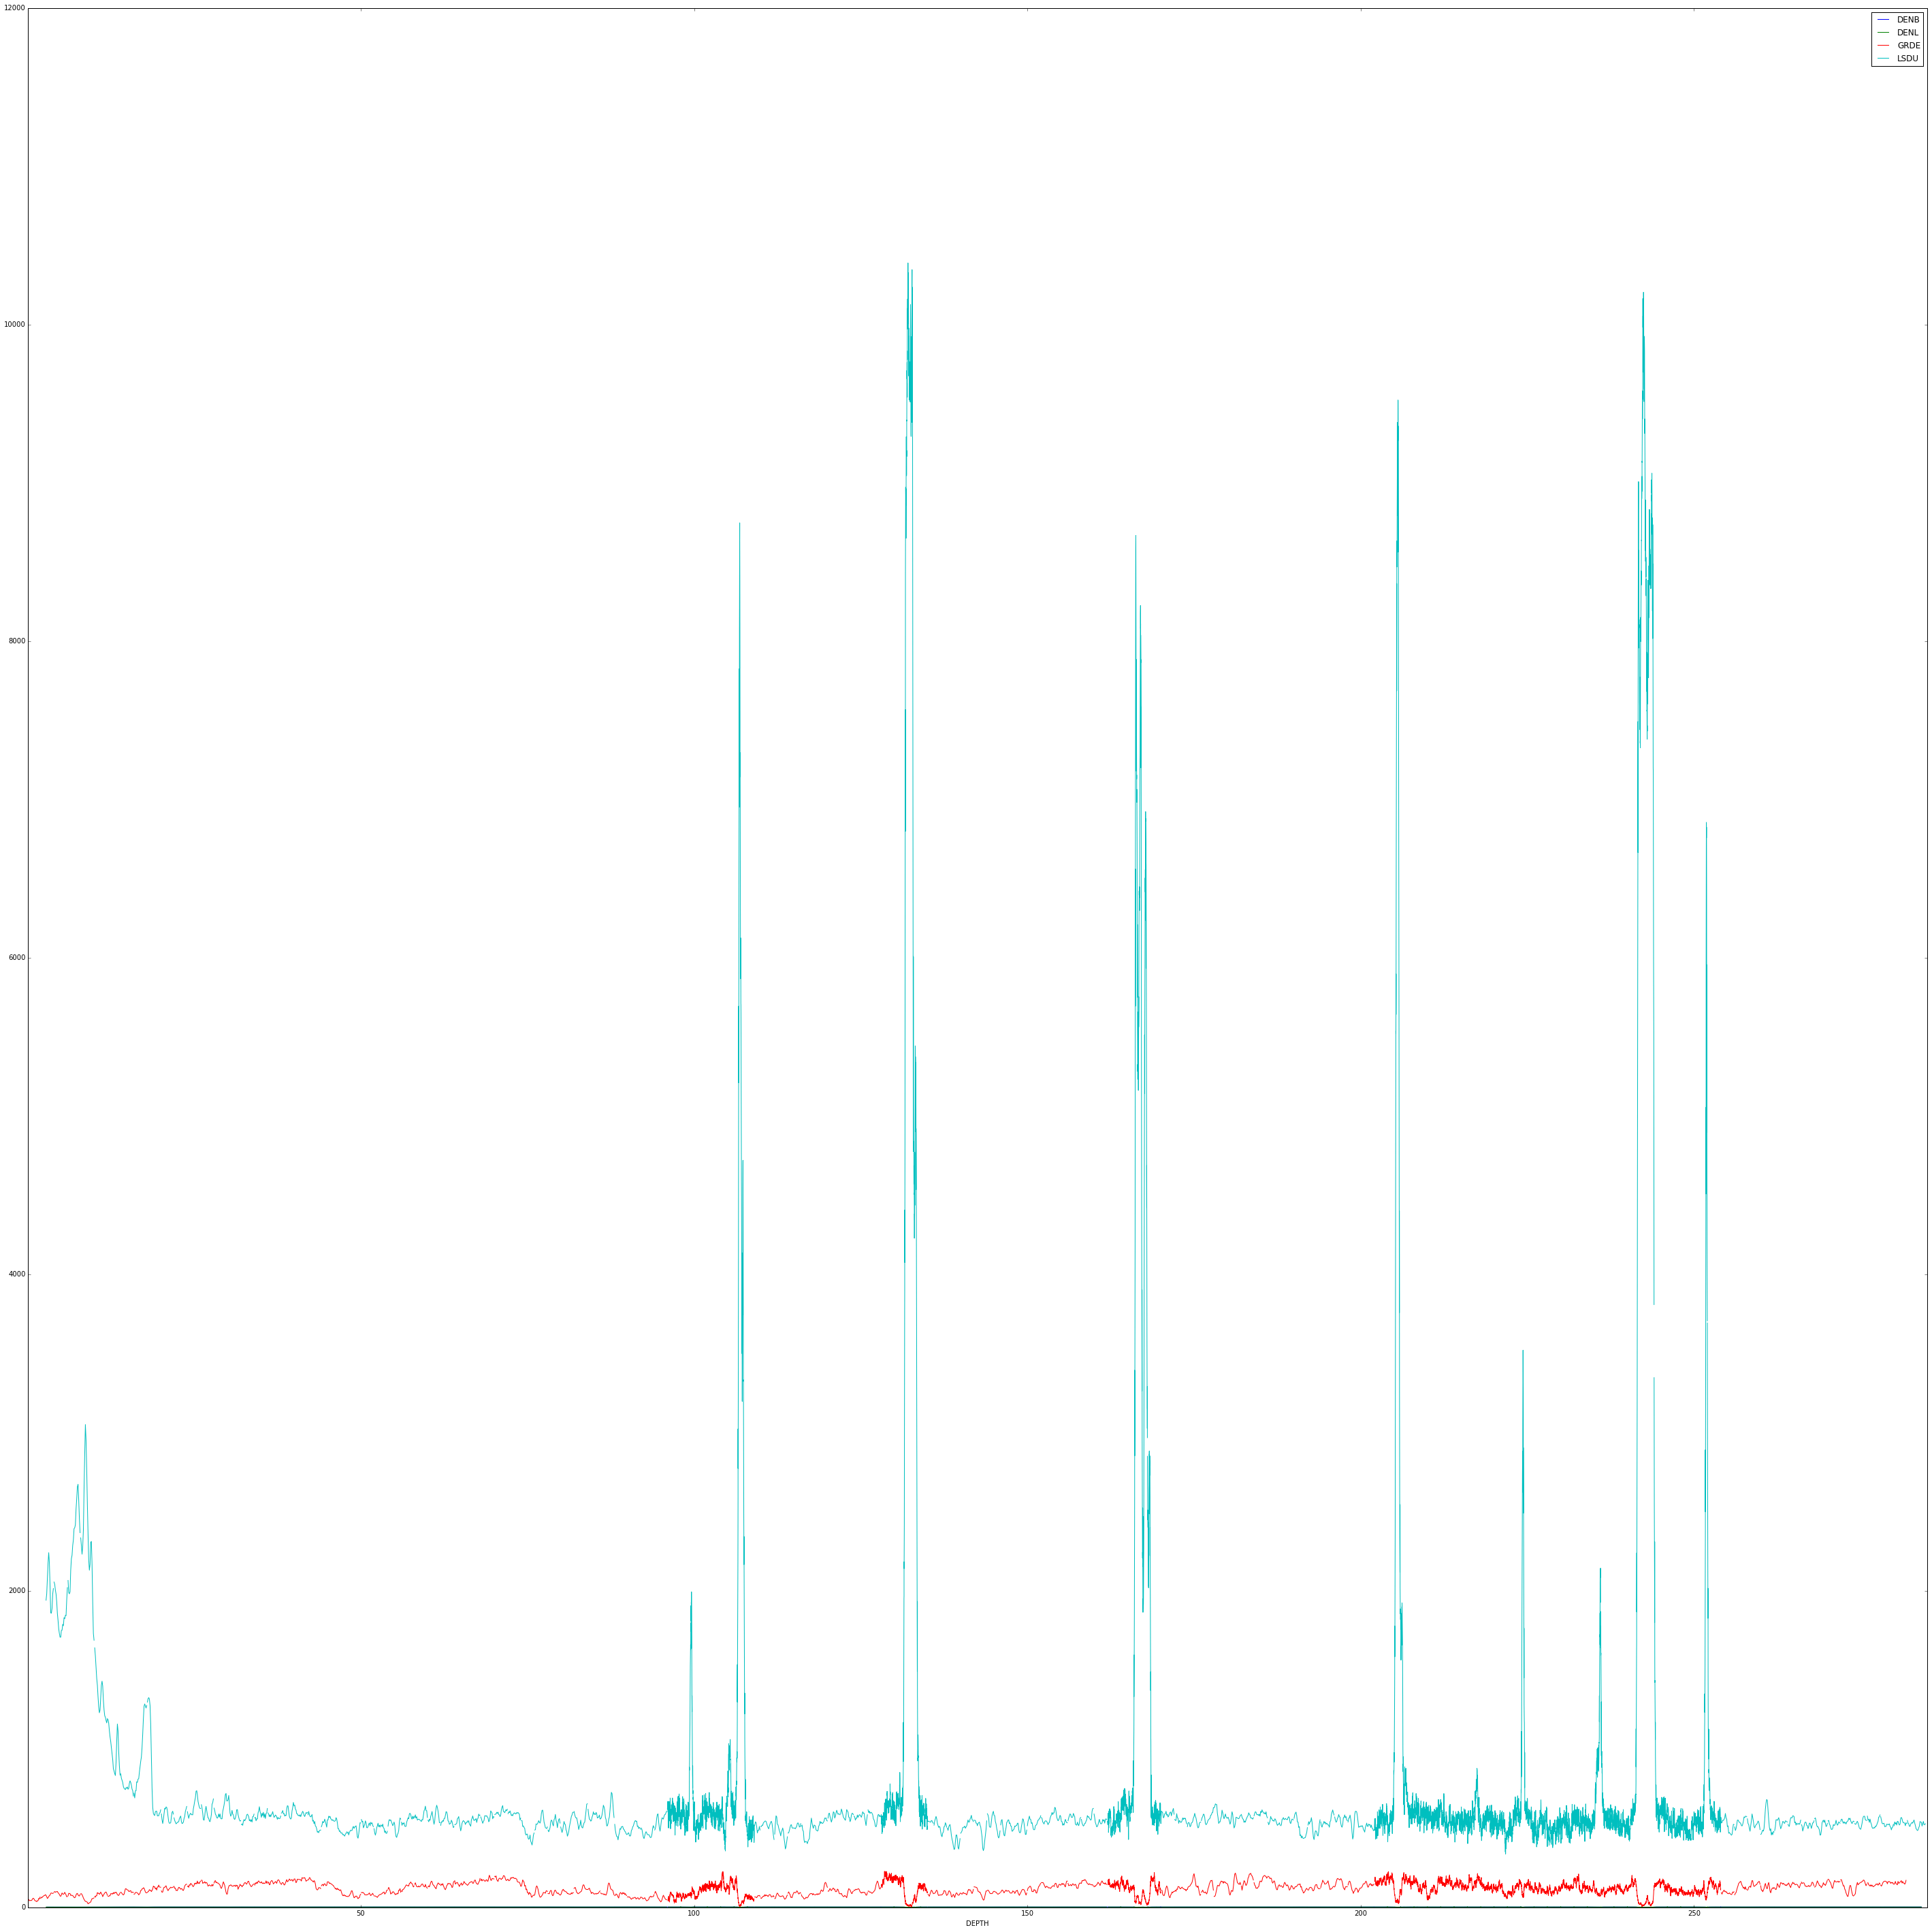

In [7]:
subset.plot(x='DEPTH',y=['DENB','DENL','GRDE','LSDU'],figsize=(50,50))

In [6]:
boreid = 'DD0541'
[utils.get_label(boreid, d) for d in range(100)]

[None,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'FH',
 'FH',
 'FH',
 'FH',
 'FH',
 'FH',
 'FH',
 'FH',
 'FH',
 'FH',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [68]:
# Drafting the function for getting the window.

#def get_windows(bore_id, centre_point, window_size, bin_width):

atv = pd.read_excel('Acoustic Scanner/ATV_Data_{}.xlsx'.format(bore_id))


In [181]:
df = geo.query('HOLEID == @boreid').sort('DEPTH')
centre_point = 280
window_size = 1
column = 'DENB'
bin_width = 0.1

def calc_bin_per_column(df, column, centre_point, window_size, bin_width):
    bottom = centre_point - window_size/2.
    top = centre_point + window_size/2.
    inner_window_size = abs(bottom-top)/bin_width
    data = df[[column, 'DEPTH']].query('DEPTH > @bottom and DEPTH <= @top').sort('DEPTH')
    ret = pd.rolling_mean(data[column], inner_window_size, min_periods=0)
    return ret.values[::inner_window_size]


In [127]:
inner_window_size

10.0

In [3]:
utils.get_windows?

In [35]:
import imp
imp.reload(utils)

<module 'utils' from './utils.py'>

In [15]:
utils.get_windows(boreid, centre_point=280, window_size=1, bin_width=0.1)

,ADEN,AUCS,AVOL,AXLE,AXLN,AZID,AZIF,AZP1,BBRG,BISI,...,ATV_AMP[134],ATV_AMP[135],ATV_AMP[136],ATV_AMP[137],ATV_AMP[138],ATV_AMP[139],ATV_AMP[140],ATV_AMP[141],ATV_AMP[142],ATV_AMP[143]
0,2.690000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16494.50,16553.8,16508.2,16553.00,16183.5,16086.9,16231.80,16263.50,16105.95,16098.3
1,2.776154,NaN,NaN,NaN,NaN,231.425,NaN,NaN,NaN,NaN,...,15662.40,15528.4,15422.8,15288.00,15368.0,15228.4,15241.20,15260.40,15395.20,15434.0
2,2.664444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15639.20,15522.0,15373.6,15394.40,15329.6,15316.8,15224.00,15370.40,15299.20,15243.6
3,2.696154,NaN,NaN,NaN,NaN,232.590,NaN,NaN,NaN,NaN,...,15497.10,15307.6,14978.4,14942.80,14856.4,14825.2,14795.20,14744.00,14821.60,14618.8
4,2.767778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15970.40,15873.2,15628.0,15495.60,15477.2,15415.2,15463.60,15257.60,15180.80,14982.4
5,2.744545,NaN,NaN,-4.42,-4.05,235.110,NaN,NaN,227,NaN,...,16181.20,16082.0,16160.8,15893.65,15816.8,15917.2,15942.85,15736.85,15739.60,15639.2
6,2.675385,NaN,NaN,NaN,NaN,234.135,NaN,NaN,NaN,NaN,...,16435.20,16608.8,16467.2,16158.40,16243.6,16322.0,16176.00,16078.00,15931.60,15873.2
7,2.732222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16592.80,16604.8,16558.0,16281.20,16155.6,16353.6,16255.60,16206.00,16208.00,16066.8
8,2.693846,NaN,NaN,NaN,NaN,231.075,NaN,NaN,NaN,NaN,...,16220.80,16332.8,16155.2,16215.60,16109.2,16076.0,16104.00,16035.30,16017.60,15974.9
9,2.708889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15056.05,15196.4,15158.0,14904.80,15132.0,14956.4,15125.60,14987.25,15192.80,15172.8


In [17]:
utils.get_label(boreid, depth=280)

nan

In [18]:
import json

In [19]:
with open('processed/DD1097.json') as fp:
    dat = json.load(fp)

In [20]:
dat

{'Coal Depth': 14.129999999999939,
 'Coal Percentage': 0.04655683690280046,
 'Seam Structure': [[153.52, 155.29],
  [175.8, 178.62],
  [208.16, 209.86],
  [223.63, 224.1],
  [261.25, 262.09],
  [262.42, 264.21],
  [276.91, 278.24],
  [294.83, 298.24]],
 'Total Depth': 303.5}

In [21]:
seam = dat['Seam Structure']

In [33]:
js = []
js.append({'top': 0, 'bot': seam[0][0], 'type':'Not Coal'})
for i, item in enumerate(seam):
    js.append({'top':item[0], 'bot':item[1], 'type':'Coal'})
    
    if i < len(seam)-1:
        item[1]

        seam[i+1]
        js.append({'top':item[1], 'bot':seam[i+1][0], 'type':'Not Coal'})

with open('output.json','w') as fp:
    json.dump(js, fp)

[{'bot': 153.52, 'top': 0, 'type': 'Not Coal'},
 {'bot': 155.29, 'top': 153.52, 'type': 'Coal'},
 {'bot': 175.8, 'top': 155.29, 'type': 'Not Coal'},
 {'bot': 178.62, 'top': 175.8, 'type': 'Coal'},
 {'bot': 208.16, 'top': 178.62, 'type': 'Not Coal'},
 {'bot': 209.86, 'top': 208.16, 'type': 'Coal'},
 {'bot': 223.63, 'top': 209.86, 'type': 'Not Coal'},
 {'bot': 224.1, 'top': 223.63, 'type': 'Coal'},
 {'bot': 261.25, 'top': 224.1, 'type': 'Not Coal'},
 {'bot': 262.09, 'top': 261.25, 'type': 'Coal'},
 {'bot': 262.42, 'top': 262.09, 'type': 'Not Coal'},
 {'bot': 264.21, 'top': 262.42, 'type': 'Coal'},
 {'bot': 276.91, 'top': 264.21, 'type': 'Not Coal'},
 {'bot': 278.24, 'top': 276.91, 'type': 'Coal'},
 {'bot': 294.83, 'top': 278.24, 'type': 'Not Coal'},
 {'bot': 298.24, 'top': 294.83, 'type': 'Coal'}]